# Step 5. Write down the equations
Balance equations are the basis of most models

We almost always start with a mass (material) balance (mass conservation)

We track what we call the hold-up, which is the amount held inside the system

The general form of balance:
\begin{equation}
\ {Change}\,{in}\,{holdup}\,{over}\,{time} = in - out + generation - destruction
\end{equation}

Change in hold-up over time is typicall called accumulation

For the lake, we could write:
- Change in hold-up over time:
\begin{equation}
\frac{dM}{dt}
\end{equation}
- In:
\begin{equation}
F_{rain} + F_{stream}
\end{equation}
- Out:
\begin{equation}
F_{evap} + F_{ground} + F_{farmers} + F_{pump}
\end{equation}

Note: there are no generation or destruction terms in our model

|Variable | Meaning |
|--- | --- |
|$M$ | Mass of water in the lake (Mg) |
|$F_{rain}$ | Mass flow of rain into the lake (Mg/min) |
|$F_{stream}$ | Mass flow of stream coming into the lake (Mg/min) |
|$F_{evap}$ | Mass flow evaporating water (Mg/min) |
|$F_{ground}$ | Mass flow of water going to ground water (Mg/min) |
|$F_{farmers}$ | Mass flow of water taken out of lake by farmers (Mg/min) |
|$F_{pump}$ | Mass flow of water pumped out of the lake (Mg/min) |


Combining equations (1) to (4):
\begin{equation}
\frac{dM}{dt} = F_{rain} + F_{stream} - F_{evap} - F_{ground} - F_{farmers} - F_{pump}
\end{equation}

After we have written down the balances, we can write the algebraic equations

The algebraic equations describe "static" relations between variables
- In the lake example, we can define the mass holdup as a function of the volume and density:
\begin{equation}
\ M = \rho V
\end{equation}
- We can write the volume as a function of the level in the lake and the area:
\begin{equation}
\ V = Ah
\end{equation}

|Variable | Meaning |
|--- | --- |
|$\rho$| Mass density of water (kg/m$^{3}$) |
|$V$| Volume of water in lake (k.m$^{3}$) |
|$A$| Area of water in lake (k.m$^{2}$) |
|$h$| Level of the water in the lake (m) |

## Step 5.1 Write down the equations (initial conditions)
The accumulation term ($\frac{d}{dt}$) only describes how the system changes with time

We therefore need to know where the system starts; this is call teh "initial condition"

<center><font color=blue>For every equation with a $\frac{d}{dt}$ term (differential equation), we need an initial condition</font></center>

For the lake example, for $A = 100$ k.m$^{2}$ and $\rho = 1000$ kg/m$^{3}$ we could use any of the following conditions:
- $M = 1\cdot10^6$ Mg
- $V = 1\cdot10^3$ k.m$^{3}$
- $h = 10$ m

## Step 5.2 Write down the equations - Summary
- 3 equations:
\begin{equation}
\frac{dM}{dt} = F_{rain} + F_{stream} - F_{evap} - F_{ground} - F_{farmers} - F_{pump}
\end{equation}
\begin{equation}
\ M = \rho V
\end{equation}
\begin{equation}
\ V = Ah
\end{equation}

- 2 parameters: $\rho$, $A$ (parameters do not change during the simulation)

- 9 variables: $M, V, h, F_{rain}, F_{stream}, F_{evap}, F_{ground}, F_{farmers}, F_{pump}$

<center><font color=blue>Note: Time is an independent variable here</font></center>

# Step 6. Implement the equations and run the simulation

## 6.1 Import packages needed to run the simulation

In [2]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

## 6.2 Create a model and define the parameters and variables

In [18]:
m = GEKKO() # create GEKKO model
m.time = np.linspace(0,120,120) # define the time over which to solve the model

# define the constant parameters
rho = m.Const(value = 1) #g/ml
A = m.Const(value = 0.00785)

# define the varibles.
# Note in this instance since we're not altering them over the course of the simulation they are defined as constants
Ffeed = m.Const(value = 1) #g/min
Fantisol = m.Const(value = 3) #g/min
Fevap = m.Const(value = 0.01) #g/min
Fpump = m.Const(value = 4.01) #g/min

# for this instance these are true variables and will change over the course of the simulation
M = m.Var(value = 1000) #g
V = m.Var(value = 1000) #ml
h = m.Var(value = 0.127) #m
x = m.Var(value = 1) #mass fraction solvent
Msol = m.Var(value = 1000) #g
Mantisol = m.Var(value = 0) #g
t = m.Param(value=m.time)

## 6.3 Define the equations

In [19]:
m.Equation(M.dt() == Ffeed+Fantisol-Fevap-Fpump) # our balance equation
m.Equation(M == rho*V) # static equation relating mass and volume
m.Equation(V == A*h*1000000) # static equation relating volume and lake height
m.Equation(x == Msol/M) # static equation for solvent mass fraction
m.Equation(Msol.dt() == Ffeed-x*(Fevap+Fpump))
m.Equation(Mantisol.dt() == Fantisol-(1-x)*(Fevap+Fpump))

## 6.4 Setup the solver and run the simulation

Text(0, 0.5, 'Lake height (m)')

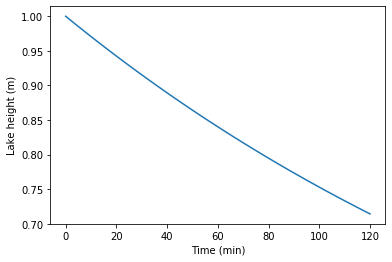

In [20]:
m.options.IMODE = 4 # Dynamic simulation with simultaneous solution of equations
m.solve(disp=False)
plt.plot(m.time,x.value)
plt.xlabel('Time (min)')
plt.ylabel('Lake height (m)')

# Step 7. Validate the model
Do your results make sense?

In order to ensure that the model predictions conform with observations from reality, you need to compare your results against measurements

If your results are inaccurate, possibly change values of the unknowns and revisit the model to make improvements or correct inaccuracies

# Step 8. Document the model
To ensure your model is clear and robust, it is always good practise to document it for others to inspect.
- Using environemnts like this (jupyter notebook) allows you to have the documentation along side the code to run the simulation